In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import matplotlib
# matplotlib.font_manager._rebuild()

import platform
path='c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc

if platform.system()=='Darwin':
    rc('font',family='AppleGothic')
elif platform.system()=='Windows':
    font_name=font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
else:
    print('Unknown system')

In [3]:
crime_anal_norm=pd.read_csv('../data/crime_anal_norm_in_Seoul.csv',encoding='euc-kr',index_col='구별')
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,검거,범죄
구별,,,,,,,,,,,,,,
강남구,0.0,1.000000,1.000000,1.000000,1.000000,NaN,92.000000,91.666667,48.903879,87.021209,537338.0,6871.0,319.591754,4.000000
강동구,0.0,0.208333,0.181818,0.525000,0.326502,NaN,100.000000,100.000000,55.148883,85.288967,465097.0,2809.0,340.437850,1.241654
강북구,0.0,0.000000,0.272727,0.003125,0.172799,NaN,100.000000,100.000000,69.111969,90.744758,300824.0,3090.0,359.856727,0.448652
강서구,0.0,0.083333,0.727273,0.480000,0.505822,NaN,100.000000,77.777778,59.805195,91.754051,578426.0,2744.0,329.337024,1.796428
관악구,0.0,0.250000,0.636364,0.680000,0.575687,NaN,85.714286,50.000000,49.946237,85.676157,500336.0,5149.0,271.336679,2.142051


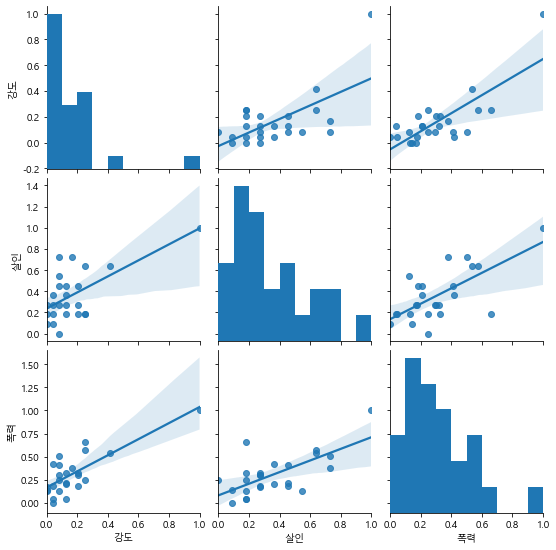

In [15]:
sns.pairplot(crime_anal_norm,vars=['강도','살인','폭력'],kind='reg')
plt.rc('axes', unicode_minus=False) # 이거 추가했더니, 폰트 경고가 사라지네... 오....!!! 근데 폰트 문제가 아니라 - 문제인 듯.
plt.show()

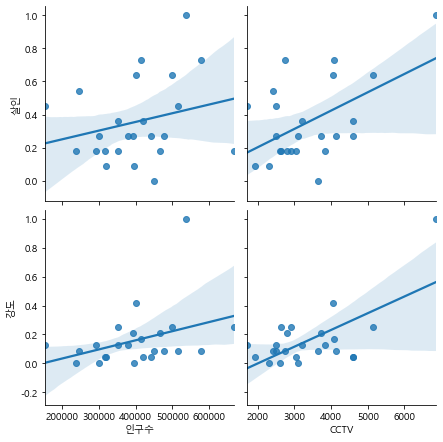

In [14]:
sns.pairplot(crime_anal_norm, x_vars=['인구수','CCTV'], y_vars=['살인','강도'], kind='reg', height=3)
plt.rc('axes', unicode_minus=False)
plt.show()

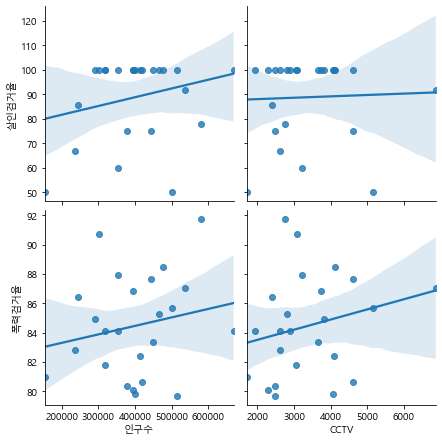

In [20]:
sns.pairplot(crime_anal_norm,
            x_vars=['인구수','CCTV'],
            y_vars=['살인검거율','폭력검거율'],kind='reg',height=3)
plt.show()

In [22]:
tmp_max=crime_anal_norm['검거'].max()
crime_anal_norm['검거']=crime_anal_norm['검거'] / tmp_max *100
crime_anal_norm_sort=crime_anal_norm.sort_values(by='검거',ascending=False)
crime_anal_norm_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,검거,범죄
구별,,,,,,,,,,,,,,
양천구,0.983051,0.083333,0.000000,0.360625,0.248719,79.310345,100.0,100.0,51.890289,83.376455,449378.0,3650.0,100.000000,1.675728
서초구,0.398305,0.166667,0.727273,0.456875,0.379599,78.723404,100.0,100.0,45.974717,82.430213,413677.0,4082.0,98.203288,2.128719
성북구,1.000000,0.041667,0.272727,0.076875,0.176991,74.576271,100.0,75.0,52.960894,87.643678,442680.0,4602.0,94.115390,1.568260
도봉구,0.610169,0.041667,0.090909,0.000000,0.000000,88.888889,50.0,100.0,48.704663,84.090909,318100.0,1930.0,89.653884,0.742745
강북구,0.000000,0.000000,0.272727,0.003125,0.172799,NaN,100.0,100.0,69.111969,90.744758,300824.0,3090.0,86.800920,0.448652


In [23]:
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,검거,범죄
구별,,,,,,,,,,,,,,
강남구,0.0,1.000000,1.000000,1.000000,1.000000,NaN,92.000000,91.666667,48.903879,87.021209,537338.0,6871.0,77.088619,4.000000
강동구,0.0,0.208333,0.181818,0.525000,0.326502,NaN,100.000000,100.000000,55.148883,85.288967,465097.0,2809.0,82.116899,1.241654
강북구,0.0,0.000000,0.272727,0.003125,0.172799,NaN,100.000000,100.000000,69.111969,90.744758,300824.0,3090.0,86.800920,0.448652
강서구,0.0,0.083333,0.727273,0.480000,0.505822,NaN,100.000000,77.777778,59.805195,91.754051,578426.0,2744.0,79.439273,1.796428
관악구,0.0,0.250000,0.636364,0.680000,0.575687,NaN,85.714286,50.000000,49.946237,85.676157,500336.0,5149.0,65.449029,2.142051


Text(0.5, 1.0, '범죄검거비율(정규화된 검거의 합으로 정렬)')

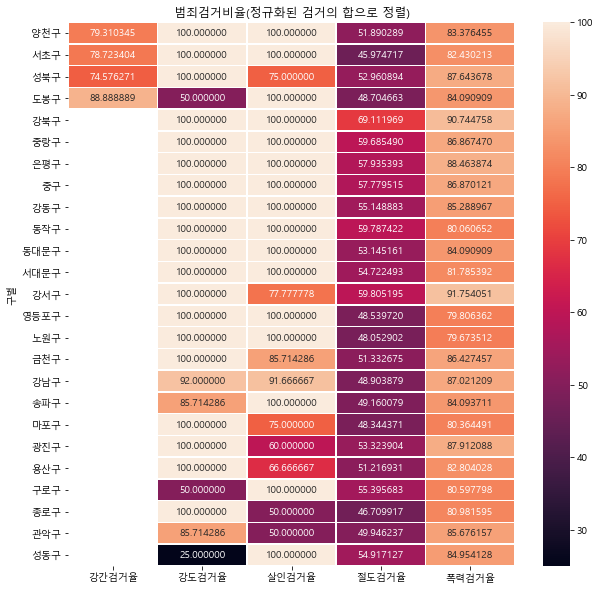

In [24]:
target_col=['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']

crime_anal_norm_sort=crime_anal_norm.sort_values(by='검거',ascending=False)

plt.figure(figsize=(10,10))
sns.heatmap(crime_anal_norm_sort[target_col],annot=True,fmt='f',linewidth=.5)
plt.title('범죄검거비율(정규화된 검거의 합으로 정렬)')

Text(0.5, 1.0, '범죄비율(정규화된 발생 건수로 정렬)')

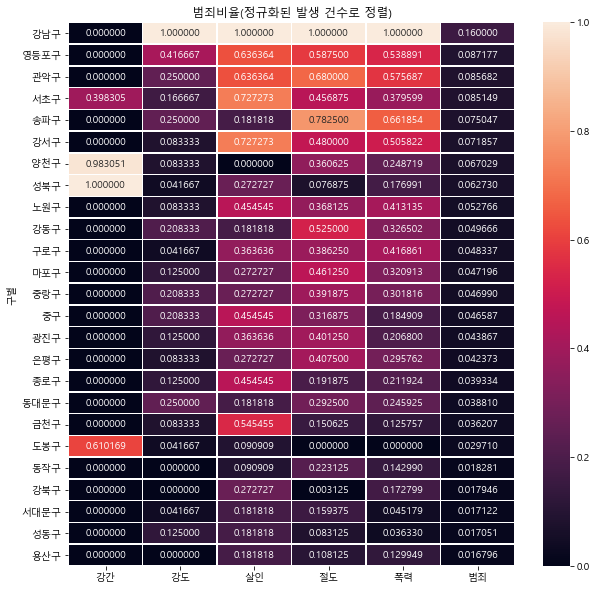

In [26]:
target_col=['강간','강도','살인','절도','폭력','범죄']

crime_anal_norm['범죄']=crime_anal_norm['범죄'] / 5
crime_anal_norm_sort=crime_anal_norm.sort_values(by='범죄',ascending=False)
plt.figure(figsize=(10,10))
sns.heatmap(crime_anal_norm_sort[target_col],annot=True,fmt='f',linewidth=.5)
plt.title('범죄비율(정규화된 발생 건수로 정렬)')

In [27]:
crime_anal_norm.to_csv('../data/crime_in_Seoul_final.csv',sep=',',encoding='euc-kr')